In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, evaluate
pd.set_option('display.max_columns', 50)
import warnings; warnings.simplefilter('ignore')

from IPython.display import Image, HTML
import json
import datetime
import ast
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.plotly as py
sns.set_style('whitegrid')
sns.set(font_scale=1.25)


In [86]:
md = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/movies_metadata.csv')
cd = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/credits.csv')
kw = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/keywords.csv')
lk = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/links.csv')
lks = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/links_small.csv')
rt = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/ratings.csv')
rts = pd.read_csv('C:/Users/GD/Downloads/the-movies-dataset/ratings_small.csv')

In [87]:
print('MD: ',md.shape)
print('CD: ',cd.shape)
print('KW: ',kw.shape)
print('LK: ',lk.shape)
print('LKS: ',lks.shape)
print('RT: ',rt.shape)
print('RTS: ',rts.shape)

MD:  (45466, 24)
CD:  (45476, 3)
KW:  (46419, 2)
LK:  (45843, 3)
LKS:  (9125, 3)
RT:  (26024289, 4)
RTS:  (100004, 4)


### Features

* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [88]:
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [89]:
md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [90]:
md.isna().sum().sort_values(ascending=False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
vote_average                 6
vote_count                   6
revenue                      6
spoken_languages             6
title                        6
video                        6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

In [91]:
#dropping unnecessary columns
md=md.drop(['homepage','original_title','imdb_id'],axis=1)

In [35]:
md.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [92]:
md=md.drop('adult', axis=1)

In [93]:
md.isna().sum().sort_values(ascending=False)

belongs_to_collection    40972
tagline                  25054
overview                   954
poster_path                386
runtime                    263
release_date                87
status                      87
original_language           11
vote_average                 6
vote_count                   6
revenue                      6
spoken_languages             6
title                        6
video                        6
popularity                   5
production_companies         3
production_countries         3
id                           0
genres                       0
budget                       0
dtype: int64

In [94]:
md[md.revenue == 0].shape

(38052, 20)

In [95]:
md.revenue = md.revenue.replace(0, np.nan)
md.revenue = pd.to_numeric(md.revenue, errors='coerce')

In [96]:
md.budget = md.budget.replace(0, np.nan)
md.budget = pd.to_numeric(md.budget, errors='coerce')

# Feature Engineering New Columns

In [97]:
md['ROI']= md.revenue / md.budget

In [98]:
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [99]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
md['poster_path'] = "<img src='" + base_poster_url + md['poster_path'] + "' style='height:100px;'>"

# EDA

In [100]:
md.title = md.title.astype('str')
md.overview=md.overview.astype('str')

In [101]:
titcorpus= ' '.join(md.title)
overcorpus= ' '.join(md.overview)

In [57]:
WordCloud(stopwords=STOPWORDS,bac ,height=1500, width=3000).generate(titcorpus)

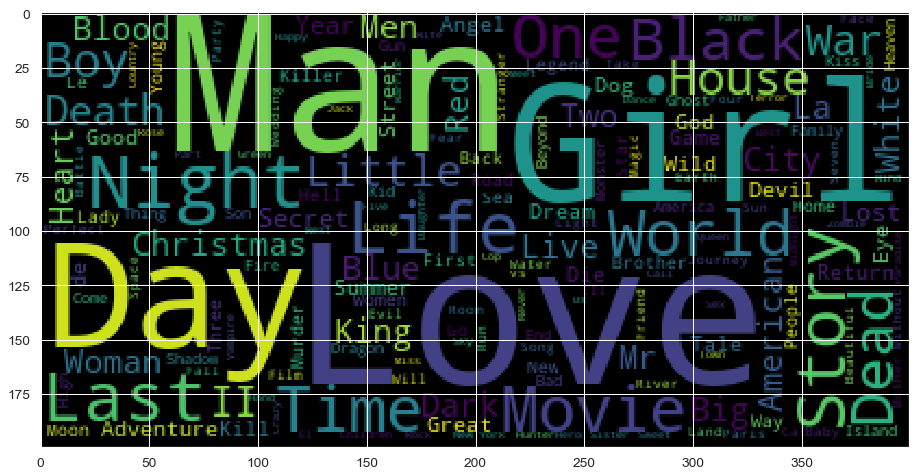

In [60]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS).generate(titcorpus))
plt.show()

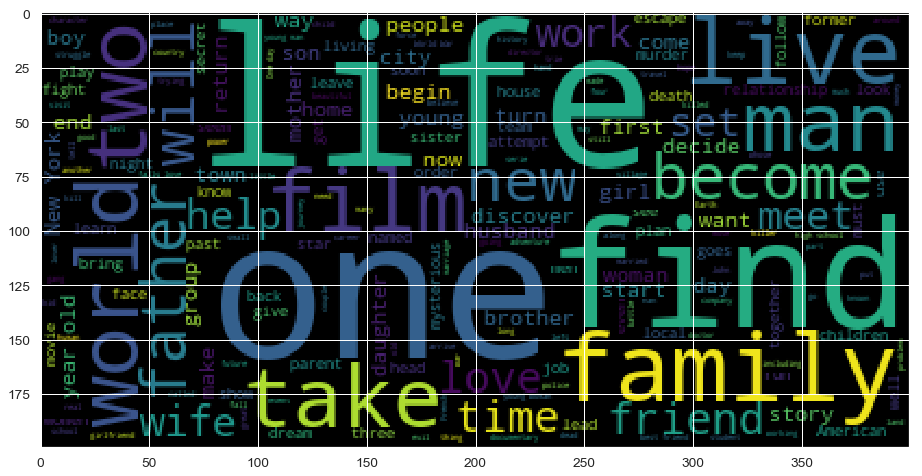

In [61]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS).generate(overcorpus))
plt.show()

# Production Countries

In [103]:
md['production_countries'] = md['production_countries'].fillna('[]').apply(ast.literal_eval)
md['production_countries'] = md['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

ValueError: malformed node or string: ['United States of America']

In [104]:
md.head(10)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,ROI,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'name': 'Pixar Animation Studios', 'id': 3}]",[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,<img src='http://image.tmdb.org/t/p/w185//16XO...,[{'name': 'Twentieth Century Fox Film Corporat...,[United States of America],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.38752,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'name': 'Sandollar Productions', 'id': 5842}...",[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,inf,1995
5,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,<img src='http://image.tmdb.org/t/p/w185//zMyf...,"[{'name': 'Regency Enterprises', 'id': 508}, {...",[United States of America],1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.123947,1995
6,NaN,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,en,An ugly duckling having undergone a remarkable...,6.67728,<img src='http://image.tmdb.org/t/p/w185//jQh1...,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[Germany, United States of America]",1995-12-15,NaN,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,NaN,1995
7,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,<img src='http://image.tmdb.org/t/p/w185//sGO5...,"[{'name': 'Walt Disney Pictures', 'id': 2}]",[United States of America],1995-12-22,NaN,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,NaN,1995
8,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,International action superstar Jean Claude Van...,5.23158,<img src='http://image.tmdb.org/t/p/w185//eoWv...,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",[United States of Am

In [105]:
s = md.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [106]:
con_df = md.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


# Franchise Movies

In [107]:
df_fran = md[md['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [127]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count', 'median','max','min']}).reset_index()

In [128]:
pd.set_option('float_format', '{:f}'.format)
#fran_pivot = (fran_pivot[['max','mean','median','sum','min']] / 1000000)
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,max,mean,median,min,sum
552,Harry Potter Collection,8,1342000000.000000,963420928.125000,936085967.500000,789804554.000000,7707367425.000000
1160,Star Wars Collection,8,2068223624.000000,929311848.750000,812699003.500000,538400000.000000,7434494790.000000
646,James Bond Collection,26,1108561013.000000,273345009.192308,173608254.500000,41744718.000000,7106970239.000000
1317,The Fast and the Furious Collection,8,1506249360.000000,640637349.125000,494650970.000000,158468292.000000,5125098793.000000
968,Pirates of the Caribbean Collection,5,1065659812.000000,904315365.200000,961000000.000000,655011224.000000,4521576826.000000
1550,Transformers Collection,5,1123746996.000000,873220248.800000,836297228.000000,604942143.000000,4366101244.000000
325,Despicable Me Collection,4,1156730962.000000,922767554.000000,995412634.500000,543513985.000000,3691070216.000000
1491,The Twilight Collection,5,829000000.000000,668421458.000000,709827462.000000,392616625.000000,3342107290.000000
610,Ice Age Collection,5,886686817.000000,643341710.600000,660940780.000000,383257136.000000,3216708553.000000
666,Jurassic Park Collection,4,1513528810.000000,757871035.750000,644440404.500000,229074524.000000,3031484143.000000


In [126]:
(fran_pivot[['max','mean','median','sum','min']] / 1000000).sort_values('sum', ascending=False).head(10)

,max,mean,median,sum,min
552,1342.000000,963.420928,936.085968,7707.367425,789.804554
1160,2068.223624,929.311849,812.699004,7434.494790,538.400000
646,1108.561013,273.345009,173.608254,7106.970239,41.744718
1317,1506.249360,640.637349,494.650970,5125.098793,158.468292
968,1065.659812,904.315365,961.000000,4521.576826,655.011224
1550,1123.746996,873.220249,836.297228,4366.101244,604.942143
325,1156.730962,922.767554,995.412634,3691.070216,543.513985
1491,829.000000,668.421458,709.827462,3342.107290,392.616625
610,886.686817,643.341711,660.940780,3216.708553,383.257136
666,1513.528810,757.871036,644.440404,3031.484143,229.074524


# Most Successful Franchise (Avg Gross)

In [129]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,max,mean,median,min,sum
112,Avatar Collection,1,2787965087.000000,2787965087.000000,2787965087.000000,2787965087.000000,2787965087.000000
1245,The Avengers Collection,2,1519557910.000000,1462480802.000000,1462480802.000000,1405403694.000000,2924961604.000000
479,Frozen Collection,1,1274219009.000000,1274219009.000000,1274219009.000000,1274219009.000000,1274219009.000000
446,Finding Nemo Collection,2,1028570889.000000,984453212.500000,984453212.500000,940335536.000000,1968906425.000000
1352,The Hobbit Collection,3,1021103568.000000,978507785.333333,958400000.000000,956019788.000000,2935523356.000000
1388,The Lord of the Rings Collection,3,1118888979.000000,972181581.000000,926287400.000000,871368364.000000,2916544743.000000
552,Harry Potter Collection,8,1342000000.000000,963420928.125000,936085967.500000,789804554.000000,7707367425.000000
1160,Star Wars Collection,8,2068223624.000000,929311848.750000,812699003.500000,538400000.000000,7434494790.000000
325,Despicable Me Collection,4,1156730962.000000,922767554.000000,995412634.500000,543513985.000000,3691070216.000000
968,Pirates of the Caribbean Collection,5,1065659812.000000,904315365.200000,961000000.000000,655011224.000000,4521576826.000000


# Most movies in a franchise

In [130]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,max,mean,median,min,sum
646,James Bond Collection,26,1108561013.000000,273345009.192308,173608254.500000,41744718.000000,7106970239.000000
473,Friday the 13th Collection,12,114908830.000000,38741545.333333,21826597.000000,14000000.000000,464898544.000000
976,Pokémon Collection,11,163644662.000000,63481890.545455,50000000.000000,20867919.000000,698300796.000000
552,Harry Potter Collection,8,1342000000.000000,963420928.125000,936085967.500000,789804554.000000,7707367425.000000
540,Halloween Collection,8,70000000.000000,30896007.000000,21651287.500000,11642254.000000,247168056.000000
29,A Nightmare on Elm Street Collection,8,115664037.000000,45448944.750000,32435623.000000,18090181.000000,363591558.000000
1317,The Fast and the Furious Collection,8,1506249360.000000,640637349.125000,494650970.000000,158468292.000000,5125098793.000000
1432,The Pink Panther (Original) Collection,8,49579269.000000,20559781.000000,11623170.500000,2438031.000000,164478248.000000
1160,Star Wars Collection,8,2068223624.000000,929311848.750000,812699003.500000,538400000.000000,7434494790.000000
977,Police Academy Collection,7,146198896.000000,43520462.428571,28061343.000000,126247.000000,304643237.000000


# Production Companies

In [131]:
md['production_companies'] = md['production_companies'].fillna('[]').apply(ast.literal_eval)
md['production_companies'] = md['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [132]:
s = md.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [136]:
com_md = md.drop('production_companies', axis=1).join(s)

In [137]:
com_sum = pd.DataFrame(com_md.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_md.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_md.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

# Highest Earning Production Houses

In [138]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,63525187272.000000,129379200.146640,491
Universal Pictures,55259190410.000000,119350303.261339,463
Paramount Pictures,48808192922.000000,123565045.372152,395
Twentieth Century Fox Film Corporation,47687746332.000000,139846763.436950,341
Walt Disney Pictures,40837270159.000000,277804558.904762,147
Columbia Pictures,32279735705.000000,136778541.122881,236
New Line Cinema,22173391499.000000,111986825.752525,198
Amblin Entertainment,17343720181.000000,255054708.544118,68
DreamWorks SKG,15475754744.000000,198407112.102564,78
Dune Entertainment,15003789066.000000,241996597.838710,62


#### Most Succesful Production Companies

Which production companies produce the most succesful movies on average? Let us find out. We will only consider those companies that have made at least 15 movies.

In [139]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,11188533734.000000,621585207.444444,18
Marvel Studios,11699635216.000000,615770274.526316,19
Revolution Sun Studios,8120339217.000000,541355947.800000,15
Lucasfilm,9898421106.000000,449928232.090909,22
DreamWorks Animation,13707515604.000000,403162223.647059,34
DC Entertainment,6212608621.000000,388288038.812500,16
Dentsu,6853205390.000000,380733632.777778,18
Jerry Bruckheimer Films,8957441075.000000,373226711.458333,24
Marvel Enterprises,6538067117.000000,344108795.631579,19
Legendary Pictures,13468663007.000000,336716575.175000,40


# Language

In [140]:
md.original_language.nunique()

92

In [143]:
md.original_language.value_counts()[:10]

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

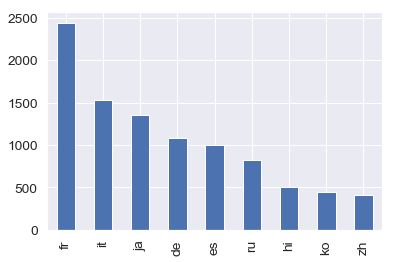

In [146]:
md.original_language.value_counts()[1:10].plot.bar()

In [147]:
md.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,ROI,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.000000,81.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.700000,5415.000000,12.451801,1995
1,NaN,65000000.000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.000000,104.000000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.900000,2413.000000,4.043035,1995
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,nan,101.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.500000,92.000000,nan,1995
3,NaN,16000000.000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.000000,127.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.100000,34.000000,5.090760,1995
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.000000,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.000000,106.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.700000,173.000000,inf,1995


In [149]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan
    
md['popularity'] = md['popularity'].apply(clean_numeric).astype('float')
md['vote_count'] = md['vote_count'].apply(clean_numeric).astype('float')
md['vote_average'] = md['vote_average'].apply(clean_numeric).astype('float')

In [150]:
md['popularity'].describe()

count   45460.000000
mean        2.921478
std         6.005414
min         0.000000
25%         0.385948
50%         1.127685
75%         3.678902
max       547.488298
Name: popularity, dtype: float64

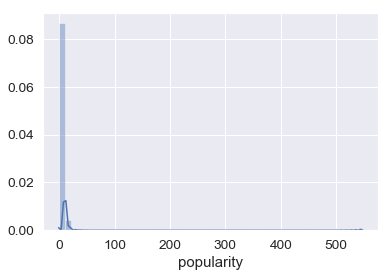

In [152]:
sns.distplot(md['popularity'].fillna(md['popularity'].median()))
plt.show()

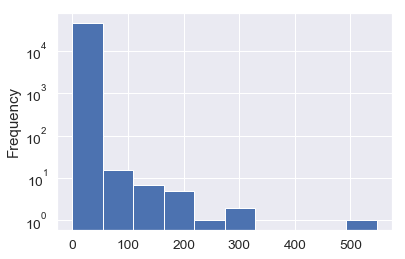

In [153]:
md['popularity'].plot(logy=True, kind='hist')

#### Most Popular Movies by Popularity Score

In [154]:
md[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


### Most voted Movies

In [155]:
md[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.000000,2010
12481,The Dark Knight,12269.000000,2008
14551,Avatar,12114.000000,2009
17818,The Avengers,12000.000000,2012
26564,Deadpool,11444.000000,2016
22879,Interstellar,11187.000000,2014
20051,Django Unchained,10297.000000,2012
23753,Guardians of the Galaxy,10014.000000,2014
2843,Fight Club,9678.000000,1999
18244,The Hunger Games,9634.000000,2012


In [156]:
md['vote_average'] = md['vote_average'].replace(0, np.nan)
md['vote_average'].describe()

count   42462.000000
mean        6.014877
std         1.256208
min         0.500000
25%         5.300000
50%         6.100000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

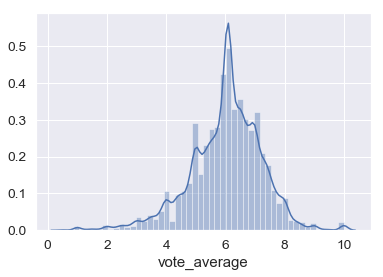

In [157]:
sns.distplot(md['vote_average'].fillna(md['vote_average'].median()))

### Most Critically Acclaimed Movies

In [158]:
md[md['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.500000,8358.000000,1994
834,The Godfather,8.500000,6024.000000,1972
2211,Life Is Beautiful,8.300000,3643.000000,1997
5481,Spirited Away,8.300000,3968.000000,2001
1152,One Flew Over the Cuckoo's Nest,8.300000,3001.000000,1975
1176,Psycho,8.300000,2405.000000,1960
2843,Fight Club,8.300000,9678.000000,1999
1178,The Godfather: Part II,8.300000,3418.000000,1974
12481,The Dark Knight,8.300000,12269.000000,2008
292,Pulp Fiction,8.300000,8670.000000,1994


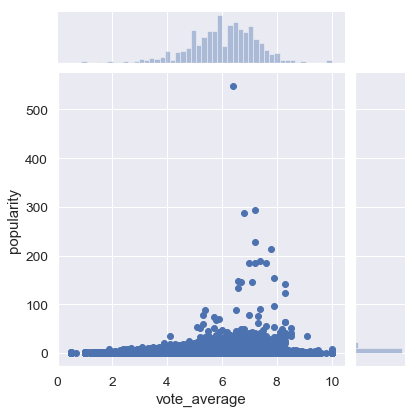

In [159]:
sns.jointplot(x='vote_average', y='popularity', data=md)

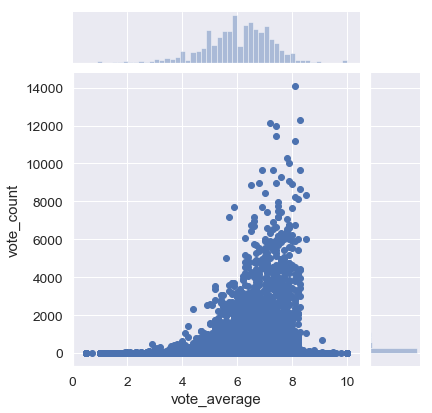

In [160]:
sns.jointplot(x='vote_average', y='vote_count', data=md)

## Release Dates

In [161]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [162]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [163]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [164]:
md['day'] = md['release_date'].apply(get_day)
md['month'] = md['release_date'].apply(get_month)

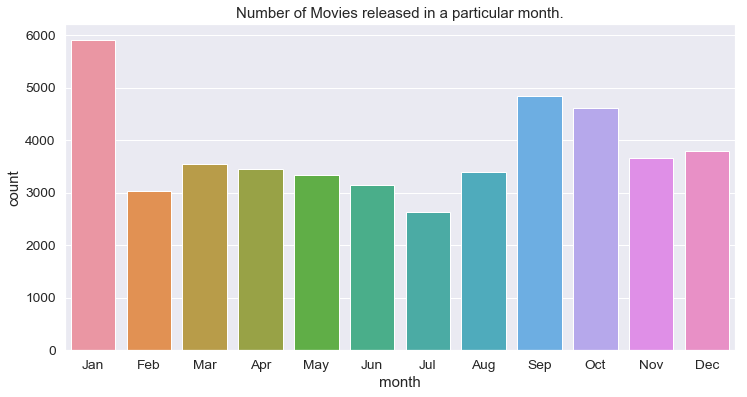

In [165]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=md, order=month_order)

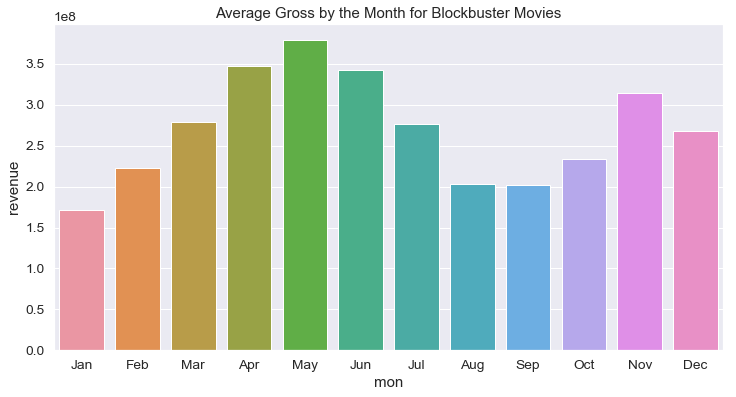

In [166]:
month_mean = pd.DataFrame(md[md['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

(0, 12)

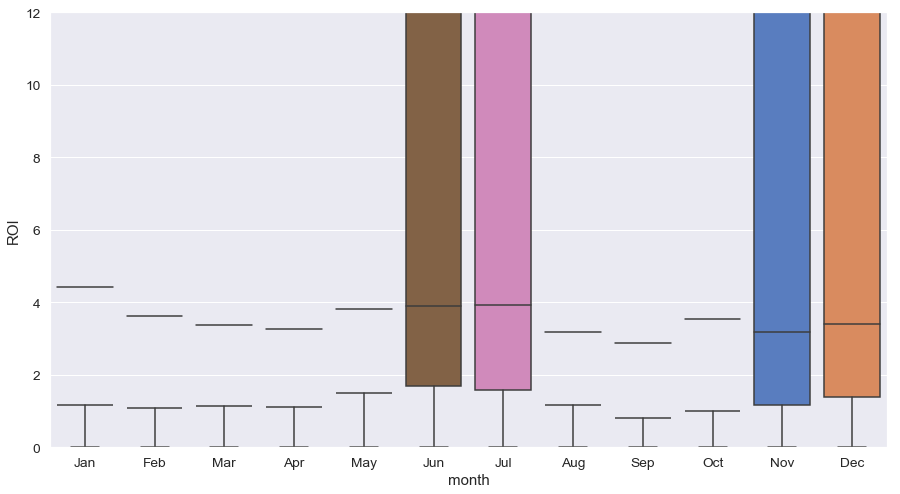

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='ROI', data=md[md['ROI'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

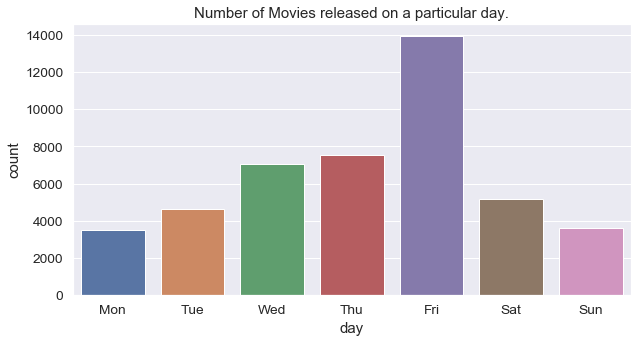

In [171]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=md, order=day_order)

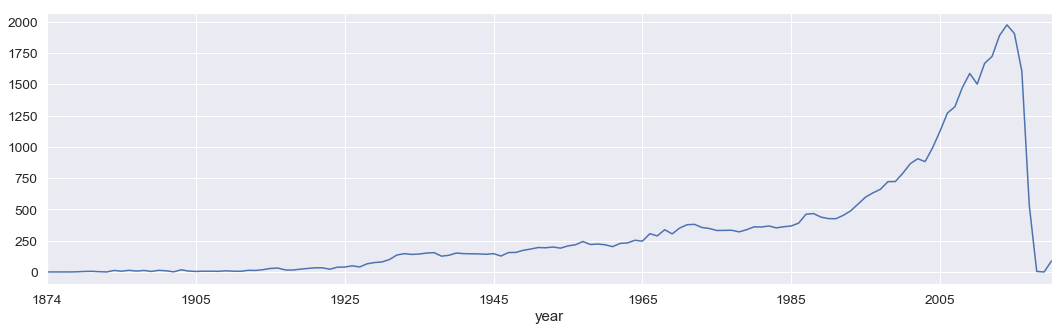

In [172]:
year_count = md.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

# Movie Status

In [173]:
md['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

# Languages

In [176]:
md['spoken_languages'] = md['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [177]:
md['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

In [178]:
md[md['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


ValueError: cannot convert float NaN to integer

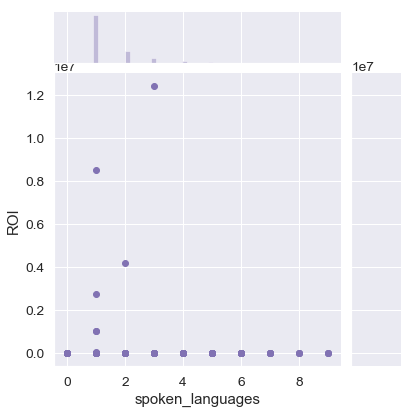

In [180]:
sns.jointplot(x="spoken_languages", y="ROI", data=md, stat_func=stats.spearmanr, color="m")

# Runtime

In [181]:
md['runtime'] = md['runtime'].astype('float')

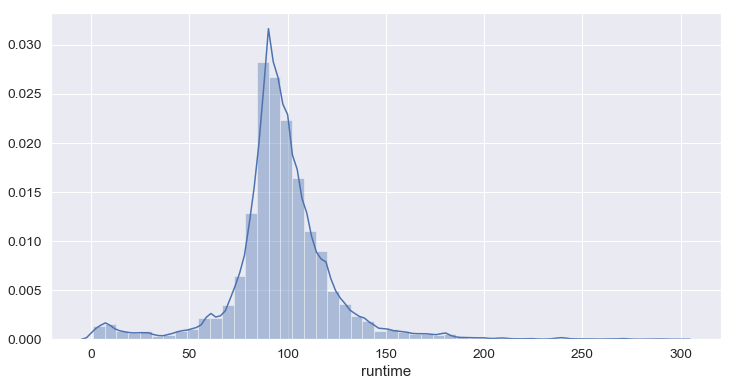

In [182]:
plt.figure(figsize=(12,6))
sns.distplot(md[(md['runtime'] < 300) & (md['runtime'] > 0)]['runtime'])

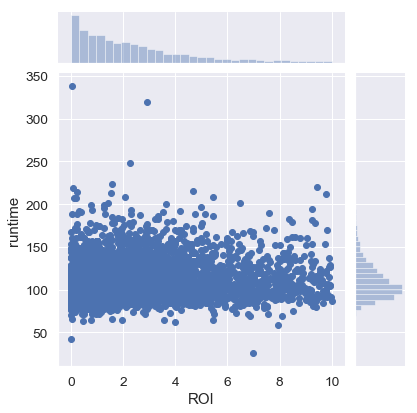

In [184]:
df_mat = md[(md['ROI'].notnull()) & (md['runtime'] > 0) & (md['ROI'] < 10)]
sns.jointplot('ROI', 'runtime', data=df_mat)
plt.show()

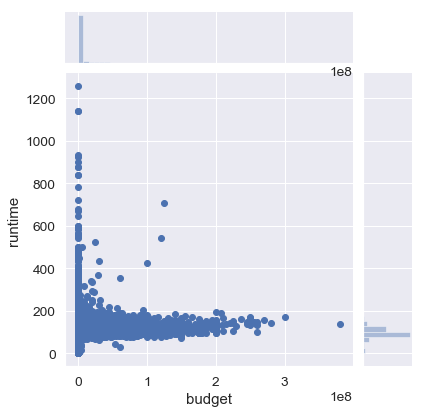

In [185]:
df_mat = md[(md['budget'].notnull()) & (md['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

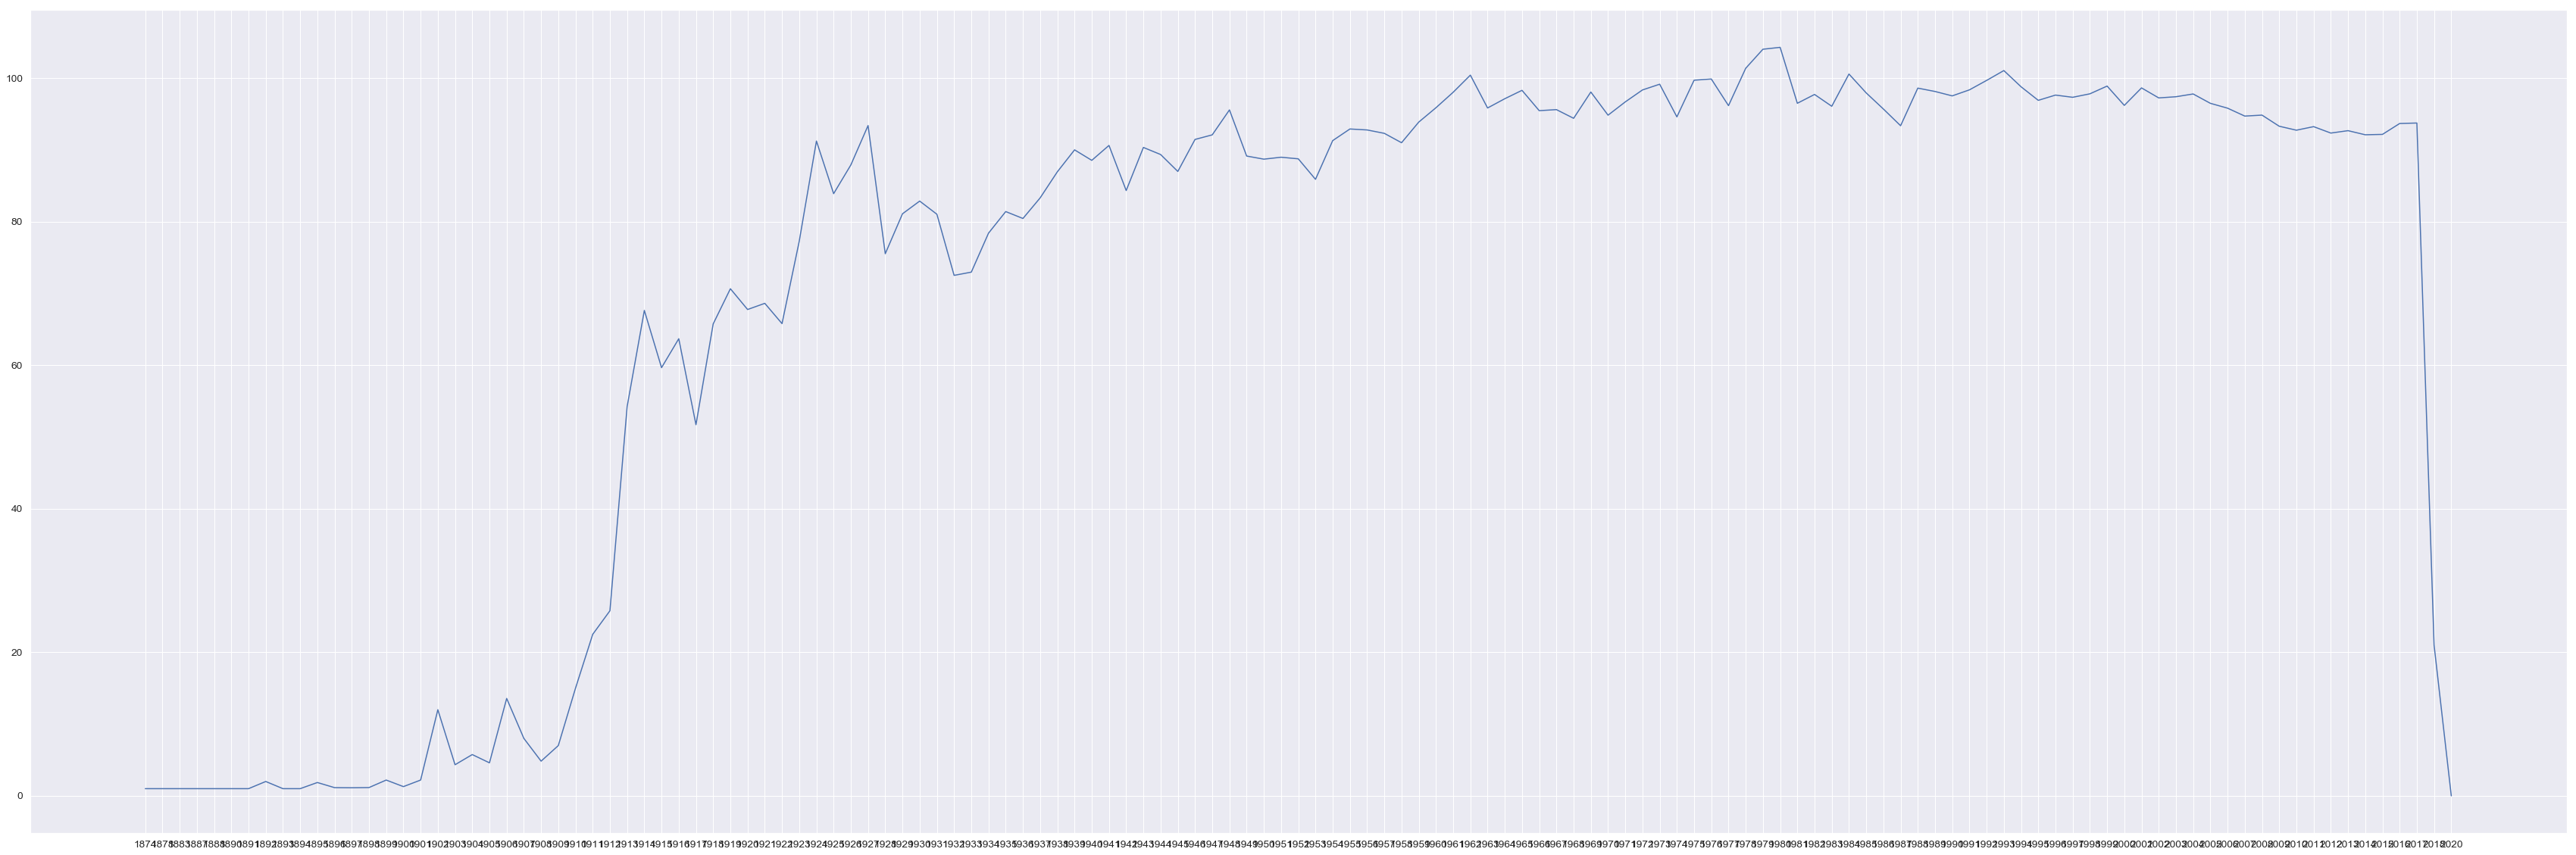

In [198]:
plt.figure(figsize=(60,20))
year_runtime = md[md['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
# plt.xticks(np.arange(1874,2014,20.0))
plt.show()

## Budget

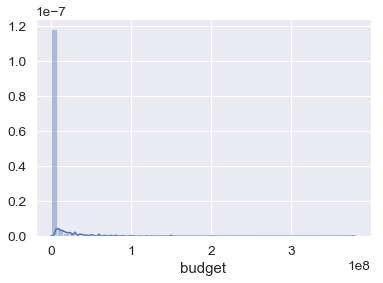

In [199]:
sns.distplot(md[md['budget'].notnull()]['budget'])

## Most expensive movies of all time

In [201]:
md[md['budget'].notnull()][['title', 'budget', 'revenue', 'ROI', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,ROI,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.000000,1045713802.000000,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.000000,961000000.000000,3.203333,2007
26558,Avengers: Age of Ultron,280000000.000000,1405403694.000000,5.019299,2015
11067,Superman Returns,270000000.000000,391081192.000000,1.448449,2006
16130,Tangled,260000000.000000,591794936.000000,2.276134,2010
18685,John Carter,260000000.000000,284139100.000000,1.092843,2012
44842,Transformers: The Last Knight,260000000.000000,604942143.000000,2.326701,2017
11780,Spider-Man 3,258000000.000000,890871626.000000,3.452991,2007
21175,The Lone Ranger,255000000.000000,89289910.000000,0.350157,2013
19971,The Hobbit: An Unexpected Journey,250000000.000000,1021103568.000000,4.084414,2012


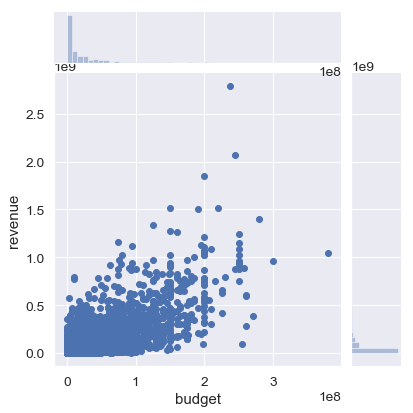

In [203]:
sns.jointplot(x='budget',y='revenue',data=md[md['ROI'].notnull()])

# Highest Grossing 

In [204]:
gross_top = md[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.000000,2787965087.000000,2009
26555,,Star Wars: The Force Awakens,245000000.000000,2068223624.000000,2015
1639,,Titanic,200000000.000000,1845034188.000000,1997
17818,,The Avengers,220000000.000000,1519557910.000000,2012
25084,,Jurassic World,150000000.000000,1513528810.000000,2015
28830,,Furious 7,190000000.000000,1506249360.000000,2015
26558,,Avengers: Age of Ultron,280000000.000000,1405403694.000000,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.000000,1342000000.000000,2011
22110,,Frozen,150000000.000000,1274219009.000000,2013
42222,,Beauty and the Beast,160000000.000000,1262886337.000000,2017


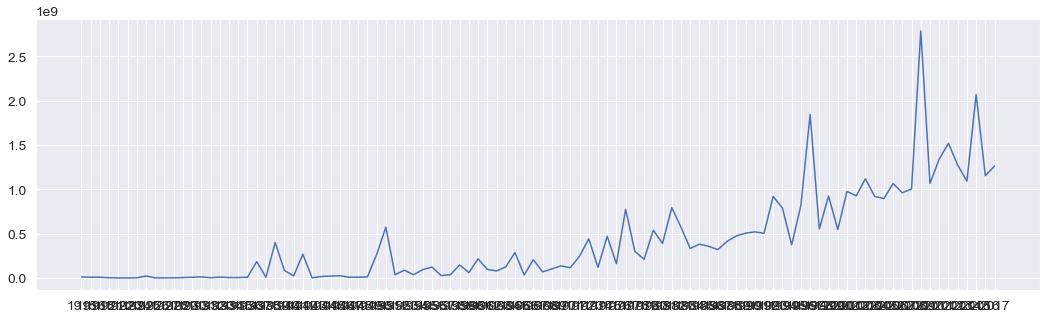

In [206]:
plt.figure(figsize=(18,5))
year_revenue = md[(md['revenue'].notnull()) & (md['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
# plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

# ROI

## Most Successful Movies

In [208]:
md[(md['ROI'].notnull()) & (md['budget'] > 5e6)][['title', 'budget', 'revenue', 'ROI', 'year']].sort_values('ROI', ascending=False).head(10)

,title,budget,revenue,ROI,year
1065,E.T. the Extra-Terrestrial,10500000.000000,792965326.000000,75.520507,1982
256,Star Wars,11000000.000000,775398007.000000,70.490728,1977
1338,Jaws,7000000.000000,470654000.000000,67.236286,1975
1888,The Exorcist,8000000.000000,441306145.000000,55.163268,1973
352,Four Weddings and a Funeral,6000000.000000,254700832.000000,42.450139,1994
834,The Godfather,6000000.000000,245066411.000000,40.844402,1972
4492,Look Who's Talking,7500000.000000,296000000.000000,39.466667,1989
24258,Annabelle,6500000.000000,255273813.000000,39.272894,2014
1056,Dirty Dancing,6000000.000000,213954274.000000,35.659046,1987
1006,The Sound of Music,8200000.000000,286214286.000000,34.904181,1965


# Disasters

In [209]:
md[(md['ROI'].notnull()) & (md['budget'] > 5e6) & (md['revenue'] > 10000)][['title', 'budget', 'revenue', 'ROI', 'year']].sort_values('ROI').head(10)

,title,budget,revenue,ROI,year
11159,Chaos,20000000.000000,10289.000000,0.000514,2005
19027,5 Days of War,20000000.000000,17479.000000,0.000874,2011
21034,Special Forces,10000000.000000,10759.000000,0.001076,2011
25732,Foodfight!,65000000.000000,73706.000000,0.001134,2012
38388,Term Life,16500000.000000,21256.000000,0.001288,2016
19505,Laurence Anyways,9500000.000000,12250.000000,0.001289,2012
12038,The Good Night,15000000.000000,20380.000000,0.001359,2007
3966,Cherry 2000,10000000.000000,14000.000000,0.001400,1987
22097,Twice Born,13000000.000000,18295.000000,0.001407,2012
5651,All The Queen's Men,15000000.000000,23000.000000,0.001533,2001


# Genres

In [210]:
md['genres'] = md['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [211]:
s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [212]:
gen_df = md.drop('genres', axis=1).join(s)

In [213]:
gen_df['genre'].value_counts().shape[0]

32

In [214]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


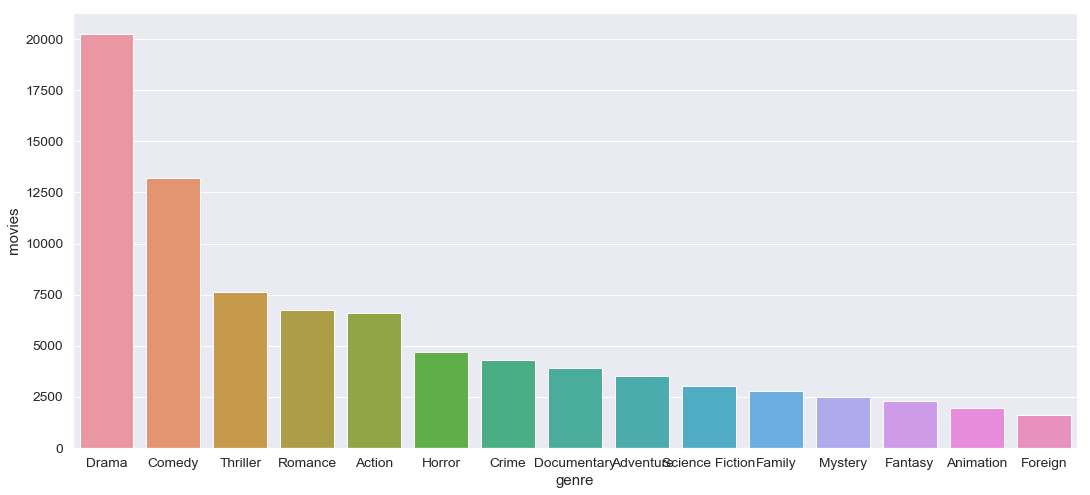

In [215]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [222]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

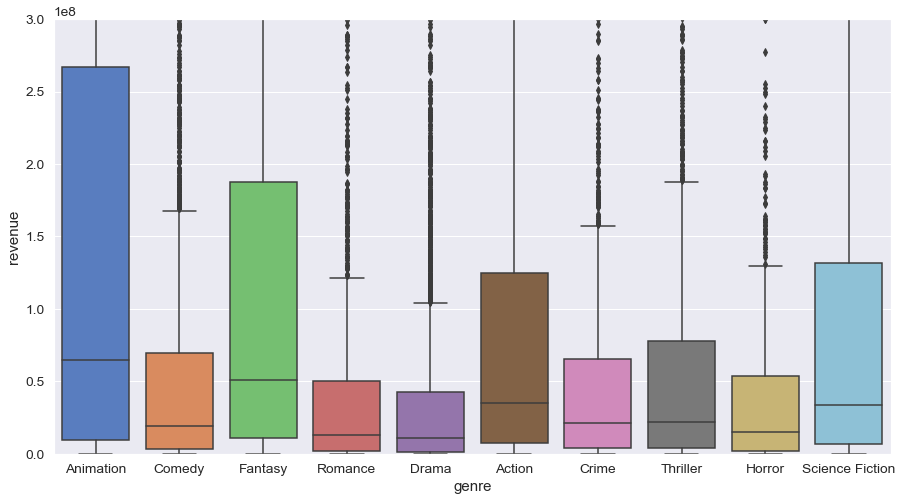

In [223]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

<Figure size 1296x576 with 0 Axes>

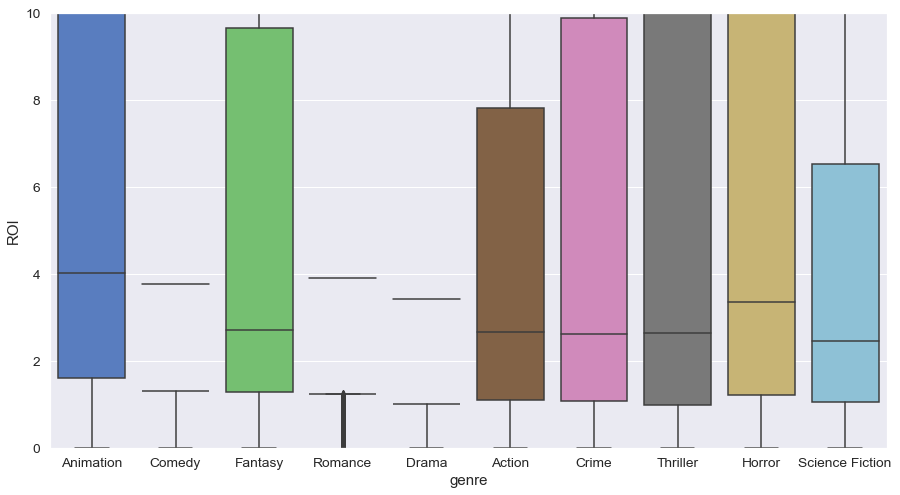

In [224]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='ROI', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

# Cast and Crew

In [228]:
cd

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, ...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gender': 2, 'id': 2178, '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': ...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': 2, 'id': 37, 'job': ...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Hanna', 'credit_id': '52fe4292c3a36847f80291f5', 'gen...","[{'credit_id': '52fe4292c3a36847f802916d', 'department': 'Directing', 'gender': 2, 'id': 638, 'j...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee', 'credit_id': '52fe44959251416c75039d97', 'gender'...","[{'credit_id': '52fe44959251416c75039da9', 'department': 'Directing', 'gender': 2, 'id': 2226, '...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'credit_id': '52fe46bdc3a36847f810f771', 'gender': 2,...","[{'credit_id': '52fe46bdc3a36847f810f797', 'department': 'Writing', 'gender': 2, 'id': 2075, 'jo...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis Thomas McCord', 'credit_id': '52fe44dbc3a36847f80ae...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'department': 'Directing', 'gender': 2, 'id': 37710, ...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'credit_id': '52fe426ec3a36847f801e10d', 'gender': 2,...","[{'credit_id': '52fe426ec3a36847f801e14b', 'department': 'Directing', 'gender': 2, 'id': 10702, ...",710


In [234]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
cd['id'] = cd['id'].apply(convert_int)

In [226]:
cd.id=cd.id.astype('int')

In [231]:
cd.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [ ]:
md=md.drop([19730, 29503, 35587])
# md[md['id']== '2012-09-29']

In [ ]:
md.id=md['id'].astype('int')

In [249]:
df = md.merge(cd, on='id')
df.shape

(45538, 26)

In [250]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [251]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [252]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [254]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
df['director'] = df['crew'].apply(get_director)

In [255]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

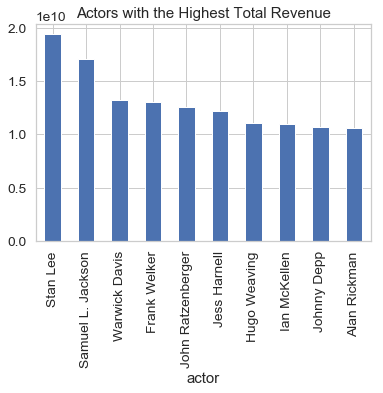

In [256]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

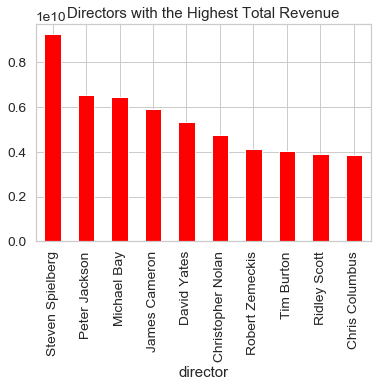

In [257]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

In [258]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

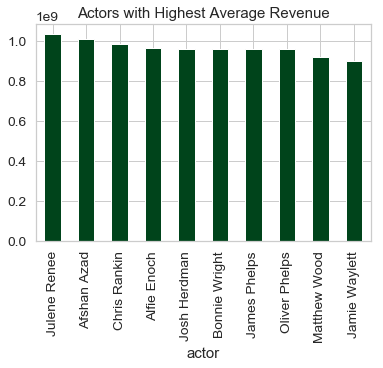

In [259]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

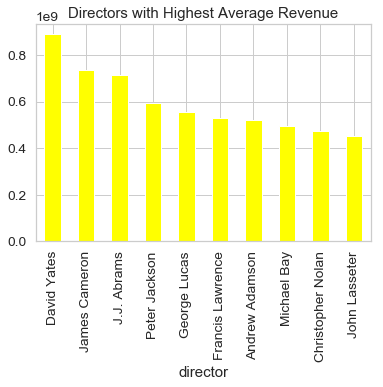

In [260]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

# Most Successful Actors

In [263]:
success_df = cast_df[(cast_df['ROI'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['ROI'].mean().sort_values(ascending=False).head(10))

,ROI
actor,
"""Weird Al"" Yankovic",inf
Orlando Jones,inf
Jack O'Connell,inf
Jack Riley,inf
Jack Thompson,inf
Jack Wallace,inf
Omid Djalili,inf
Jack Warden,inf
Omari Hardwick,inf


# Most Successful Directors

In [264]:
success_df = df[(df['ROI'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['ROI'].mean().sort_values(ascending=False).head(10))

,ROI
director,
Zhang Yimou,inf
Penny Marshall,inf
Kenneth Branagh,inf
Jonathan Lynn,inf
John Sturges,inf
John Singleton,inf
John Schlesinger,inf
John Huston,inf
John Hughes,inf


In [266]:
df[(df['director'] == 'John G. Avildsen') & (df['ROI'].notnull())][['title', 'budget', 'revenue', 'ROI', 'year']]

,title,budget,revenue,ROI,year
1853,Rocky,1000000.000000,117235147.000000,117.235147,1976
2307,Rocky V,42000000.000000,119946358.000000,2.855866,1990
2315,The Karate Kid,8000000.000000,90815558.000000,11.351945,1984
2316,"The Karate Kid, Part II",113.000000,115103979.000000,1018619.283186,1986
2317,"The Karate Kid, Part III",0.000000,38956288.000000,inf,1989
4394,For Keeps,0.000000,17514553.000000,inf,1988
4930,The Formula,0.000000,8894289.000000,inf,1980
5226,Joe,106000.000000,19319254.000000,182.257113,1970
5658,Neighbors,8500000.000000,29916207.000000,3.519554,1981
17663,Happy New Year,0.000000,41232.000000,inf,1987
